### Unsupervised Learning

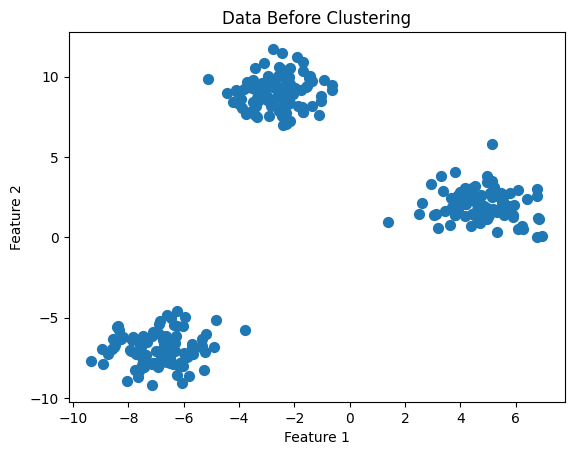

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Data Before Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

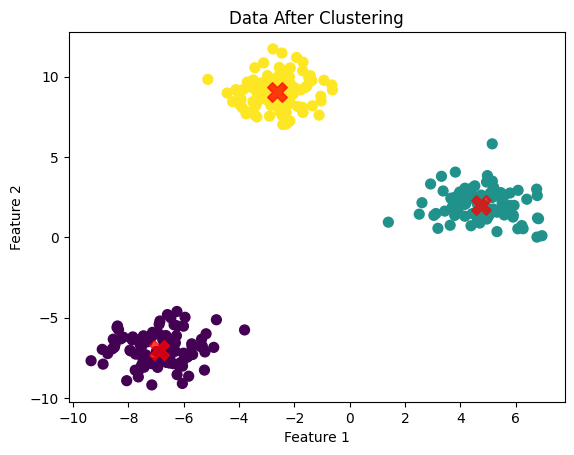

In [23]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Data After Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Recommendation & Ranked retrieval for search

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

movies = [
    "A story about space exploration and time travel.",
    "An intergalactic adventure through the universe.",
    "A romantic comedy set in Paris.",
    "A journey to save the galaxy from alien invasion."
]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(movies)

test = 'A time travel movie'
test_tfidf = vectorizer.transform([test])

similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix)

print("Similarity Scores:", similarity)

test_similarity = cosine_similarity(test_tfidf, tfidf_matrix)
print("Test Similarity Scores:", test_similarity)

Similarity Scores: [[1. 0. 0. 0.]]
Test Similarity Scores: [[0.53452248 0.         0.         0.        ]]


### DNN

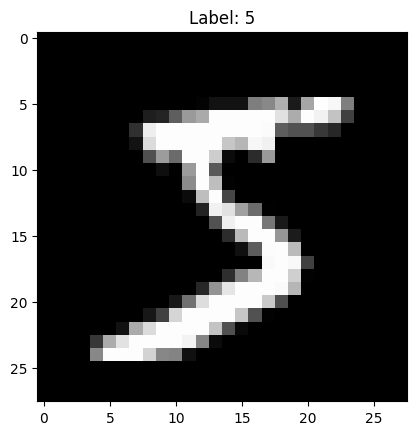

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [26]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8606 - loss: 0.4733 - val_accuracy: 0.9551 - val_loss: 0.1566
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9635 - loss: 0.1220 - val_accuracy: 0.9668 - val_loss: 0.1070
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9765 - loss: 0.0757 - val_accuracy: 0.9709 - val_loss: 0.0988
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9822 - loss: 0.0581 - val_accuracy: 0.9626 - val_loss: 0.1241
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9856 - loss: 0.0452 - val_accuracy: 0.9737 - val_loss: 0.0932


In [30]:
X_test[0,:,:].reshape(1,28,28).shape

(1, 28, 28)

In [31]:
predictions = model.predict(X_test[0,:,:].reshape(1,28,28))
predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


array([[1.83538816e-07, 1.48877914e-08, 4.57146489e-05, 6.30350143e-04,
        2.10668722e-12, 5.18112619e-09, 1.31715559e-11, 9.99311566e-01,
        2.70919713e-06, 9.46077216e-06]], dtype=float32)

In [32]:
np.argmax(predictions)

7

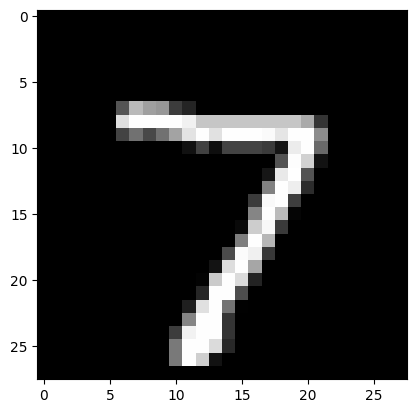

In [33]:
plt.imshow(X_test[0,:,:].reshape(28,28), cmap='gray')